<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Machine learning - Car Prices </b></div>

![](https://img.freepik.com/vetores-gratis/modelo-isometrico-de-zona-de-estacionamento_1284-15690.jpg?t=st=1725291616~exp=1725295216~hmac=1fcd3c7f0f6ad0642653136a191e7b6b736fb5418bc4833105fe60b83ba7781e&w=826)

# Part 1 - Business Problem: Predicting Used Car Prices

**Context:**
In the highly competitive used car market, pricing accuracy is critical. Overpricing may result in unsold inventory, while underpricing could lead to reduced profit margins. The ability to predict the correct price for a used car based on its attributes can significantly impact a business's bottom line.

**Objective:**
The objective of this competition is to develop a machine learning model that accurately predicts the price of used cars based on various attributes, such as make, model, year, mileage, condition, and other relevant features. Accurate price predictions will help car dealers, individual sellers, and online marketplaces optimize pricing strategies, leading to better sales performance and customer satisfaction.

**Evaluation Metric:**
The model's performance will be evaluated using the Root Mean Squared Error (RMSE). This metric measures the average magnitude of errors between the predicted and actual car prices, giving higher penalties to larger errors. A lower RMSE indicates a more accurate model.

**Impact:**
An effective pricing model will allow stakeholders to set competitive prices that attract buyers while maximizing profit margins. It will also help buyers make informed purchasing decisions by providing fair market value estimates.

**Conclusion:**
By leveraging the power of machine learning, this competition aims to enhance the accuracy of used car price predictions, benefiting both sellers and buyers in the used car market.


In [1]:
# Installing packages
!pip install watermark

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [3]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.14
Author: Library versions

matplotlib: 3.7.5
watermark : 2.4.3
pandas    : 2.2.2
plotly    : 5.22.0
re        : 2.2.1
numpy     : 1.26.4
seaborn   : 0.12.2



# Part 2 - Database

In [4]:
# Database
train_df = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")

# Viewing dataset
train_df

id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_type                                             engine  \
0            Gasoline       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1            Gasoline       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2       E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3            Gasoline       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4            Gasoline       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...               ...                                                ...   
188528       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
188529       Gasoline      385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
188530       Gasoline       469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
188531       Gasoline                                               3.0L   
188532       Gasoline       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                          transmission                    ext_col int_col  \
0                                  A/T                     Yellow    Gray   
1                                  A/T                     Silver   Beige   
2                                  A/T                       Blue    Gray   
3       Transmission w/Dual Shift Mode                      Black   Black   
4                          7-Speed A/T                      Black   Beige   
...                                ...                        ...     ...   
188528  Transmission w/Dual Shift Mode                      White   Beige   
188529                     8-Speed A/T                      White   Black   
188530                     7-Speed A/T                      White   Black   
188531               1-Speed Automatic  Daytona Gray Pearl Effect   Black   
188532  Transmission w/Dual Shift Mode                      White   Black   

                                      accident clean_title  price  
0                                None reported         Yes   4200  
1       At least 1 accident or damage reported         Yes   4999  
2                                None reported         Yes  13900  
3                                None reported         Yes  45000  
4                                None reported         Yes  97500  
...                                        ...         ...    ...  
188528                           None reported         Yes  27500  
188529  At least 1 accident or damage reported         Yes  30000  
188530                           None reported         Yes  86900  
188531                           None reported         NaN  84900  
188532                           None reported         Yes  28995  

[188533 rows x 13 columns]

In [5]:
# Viewing first 5 data
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [6]:
# Viewing 5 latest data
train_df.tail()

id          brand                     model  model_year  milage  \
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche                Macan Base        2016   59500   

       fuel_type                                         engine  \
188528  Gasoline   420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
188529  Gasoline  385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
188530  Gasoline   469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
188531  Gasoline                                           3.0L   
188532  Gasoline   252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                          transmission                    ext_col int_col  \
188528  Transmission w/Dual Shift Mode                      White   Beige   
188529                     8-Speed A/T                      White   Black   
188530                     7-Speed A/T                      White   Black   
188531               1-Speed Automatic  Daytona Gray Pearl Effect   Black   
188532  Transmission w/Dual Shift Mode                      White   Black   

                                      accident clean_title  price  
188528                           None reported         Yes  27500  
188529  At least 1 accident or damage reported         Yes  30000  
188530                           None reported         Yes  86900  
188531                           None reported         NaN  84900  
188532                           None reported         Yes  28995

In [7]:
# Info data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [8]:
# Type data
train_df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [9]:
# Viewing rows and columns
train_df.shape

(188533, 13)

# Part 3 - Data cleaning

In [10]:
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

Checking for missing values in each column:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [11]:
# Checking the number of null values ​​in specific columns
print(train_df[['fuel_type', 'accident', 'clean_title']].isnull().sum())

fuel_type       5083
accident        2452
clean_title    21419
dtype: int64


In [12]:
# Drop 'id' column
train_df = train_df.drop(['id'], axis=1)
train_df

brand                     model  model_year  milage  \
0                MINI             Cooper S Base        2007  213000   
1             Lincoln                     LS V8        2002  143250   
2           Chevrolet         Silverado 2500 LT        2002  136731   
3             Genesis          G90 5.0 Ultimate        2017   19500   
4       Mercedes-Benz               Metris Base        2021    7388   
...               ...                       ...         ...     ...   
188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531           Audi          S5 3.0T Prestige        2022   13895   
188532        Porsche                Macan Base        2016   59500   

            fuel_type                                             engine  \
0            Gasoline       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1            Gasoline       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2       E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3            Gasoline       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4            Gasoline       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...               ...                                                ...   
188528       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
188529       Gasoline      385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
188530       Gasoline       469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
188531       Gasoline                                               3.0L   
188532       Gasoline       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                          transmission                    ext_col int_col  \
0                                  A/T                     Yellow    Gray   
1                                  A/T                     Silver   Beige   
2                                  A/T                       Blue    Gray   
3       Transmission w/Dual Shift Mode                      Black   Black   
4                          7-Speed A/T                      Black   Beige   
...                                ...                        ...     ...   
188528  Transmission w/Dual Shift Mode                      White   Beige   
188529                     8-Speed A/T                      White   Black   
188530                     7-Speed A/T                      White   Black   
188531               1-Speed Automatic  Daytona Gray Pearl Effect   Black   
188532  Transmission w/Dual Shift Mode                      White   Black   

                                      accident clean_title  price  
0                                None reported         Yes   4200  
1       At least 1 accident or damage reported         Yes   4999  
2                                None reported         Yes  13900  
3                                None reported         Yes  45000  
4                                None reported         Yes  97500  
...                                        ...         ...    ...  
188528                           None reported         Yes  27500  
188529  At least 1 accident or damage reported         Yes  30000  
188530                           None reported         Yes  86900  
188531                           None reported         NaN  84900  
188532                           None reported         Yes  28995  

[188533 rows x 12 columns]

In [13]:
def remove_outliers(df, columns, min_rows=10):
    """
    Removes outliers from the specified numeric columns using the IQR method,
    ensuring that at least `min_rows` remain in the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame from which outliers will be removed.
    columns (list): A list of column names where outliers should be removed.
    min_rows (int): The minimum number of rows that should remain in the DataFrame 
                    after removing outliers. Default is 10.
    
    Returns:
    DataFrame: A DataFrame with outliers removed from the specified columns.
    """
    
    for col in columns:
        # Attempt to convert the column to numeric, ignoring errors
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Fill NaN values with the median of the column (or another appropriate method)
        df[col].fillna(df[col].median(), inplace=True)
        
        # Calculate the first and third quartiles and the interquartile range (IQR)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Apply the outlier filter only if it leaves at least `min_rows` in the DataFrame
        filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        if filtered_df.shape[0] >= min_rows:
            df = filtered_df
        else:
            # Print a message if the filter would remove too many rows
            print(f"Column: {col} - Unable to apply outlier filter without removing all rows.")
    
    return df

# Applying the function to the train_df DataFrame
numeric_columns = ['price', 'milage', 'engine']
train_df = remove_outliers(train_df, numeric_columns)

train_df.head()


Column: engine - Unable to apply outlier filter without removing all rows.


brand              model  model_year  milage      fuel_type  \
1        Lincoln              LS V8        2002  143250       Gasoline   
2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   
5           Audi      A6 2.0T Sport        2018   40950       Gasoline   

   engine                    transmission ext_col int_col  \
1     NaN                             A/T  Silver   Beige   
2     NaN                             A/T    Blue    Gray   
3     NaN  Transmission w/Dual Shift Mode   Black   Black   
4     NaN                     7-Speed A/T   Black   Beige   
5     NaN                             A/T   White       –   

                                 accident clean_title  price  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500  
5                           None reported         Yes  29950

In [14]:
# Assuming you have a function for data cleaning and outlier removal
def clean_and_remove_outliers(df):
    # Apply data cleaning and outlier removal
    # Example:
    # df = df.dropna()  # Remove missing values
    # df = df[df['column_name'] < threshold]  # Remove outliers based on a threshold
    return df

# Apply the same transformations to the test set
X_test_kaggle = clean_and_remove_outliers(test_df.drop(columns=['id']))  # Removing only the 'id' column

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Applying outlier removal to the correct columns in the test set
# Replace with the correct column names
X_test_kaggle = remove_outliers(test_df.drop(columns=['id']), columns=['milage'])  

In [15]:
# Checking the number of null values ​​in specific columns
print(train_df[['fuel_type', 'accident', 'clean_title']].isnull().sum())

fuel_type       4673
accident        2217
clean_title    18854
dtype: int64


In [16]:
def drop_missing(df, columns):
    """Remove rows that contain missing values in the specified columns."""
    
    df = df.dropna(subset=columns)
    
    return df

# Applying the function to train_df
columns_to_check = ['fuel_type', 'accident', 'clean_title']
train_df = drop_missing(train_df, columns_to_check)

# Drop 'id' column
train_df = train_df.drop(['engine'], axis=1)
train_df

brand                     model  model_year  milage  \
1             Lincoln                     LS V8        2002  143250   
2           Chevrolet         Silverado 2500 LT        2002  136731   
3             Genesis          G90 5.0 Ultimate        2017   19500   
4       Mercedes-Benz               Metris Base        2021    7388   
5                Audi             A6 2.0T Sport        2018   40950   
...               ...                       ...         ...     ...   
188527      Chevrolet                Camaro Z28        1999  110000   
188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188532        Porsche                Macan Base        2016   59500   

            fuel_type                    transmission ext_col int_col  \
1            Gasoline                             A/T  Silver   Beige   
2       E85 Flex Fuel                             A/T    Blue    Gray   
3            Gasoline  Transmission w/Dual Shift Mode   Black   Black   
4            Gasoline                     7-Speed A/T   Black   Beige   
5            Gasoline                             A/T   White       –   
...               ...                             ...     ...     ...   
188527       Gasoline                             A/T   White    Gray   
188528       Gasoline  Transmission w/Dual Shift Mode   White   Beige   
188529       Gasoline                     8-Speed A/T   White   Black   
188530       Gasoline                     7-Speed A/T   White   Black   
188532       Gasoline  Transmission w/Dual Shift Mode   White   Black   

                                      accident clean_title  price  
1       At least 1 accident or damage reported         Yes   4999  
2                                None reported         Yes  13900  
3                                None reported         Yes  45000  
4                                None reported         Yes  97500  
5                                None reported         Yes  29950  
...                                        ...         ...    ...  
188527                           None reported         Yes  14500  
188528                           None reported         Yes  27500  
188529  At least 1 accident or damage reported         Yes  30000  
188530                           None reported         Yes  86900  
188532                           None reported         Yes  28995  

[152921 rows x 11 columns]

In [17]:
print("Checking for missing values in each column:")
print(train_df.isnull().sum())

Checking for missing values in each column:
brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [18]:
# Copy data
data = train_df.copy()

In this step, we performed data cleaning by removing rows that contained **NaN** (missing) values in critical columns such as 'fuel_type', 'accident', and 'clean_title'. By ensuring that these key fields have no missing data, we now have a clean and consistent dataset ready for further analysis. With the dataset cleaned and all necessary data in place, the next step will be to conduct a thorough data analysis to uncover insights and patterns.

# Part 4 - Exploratory data analysis

In [19]:
# Viewing descriptive statistics
train_df.describe().T

count          mean           std     min      25%      50%  \
model_year  152921.0   2015.037032      5.616620  1974.0   2012.0   2016.0   
milage      152921.0  71856.220630  46859.418417   100.0  33704.0  66500.0   
price       152921.0  31856.027361  21031.442986  2000.0  15499.0  27500.0   

                 75%       max  
model_year    2019.0    2024.0  
milage      102000.0  204000.0  
price        43500.0   99000.0

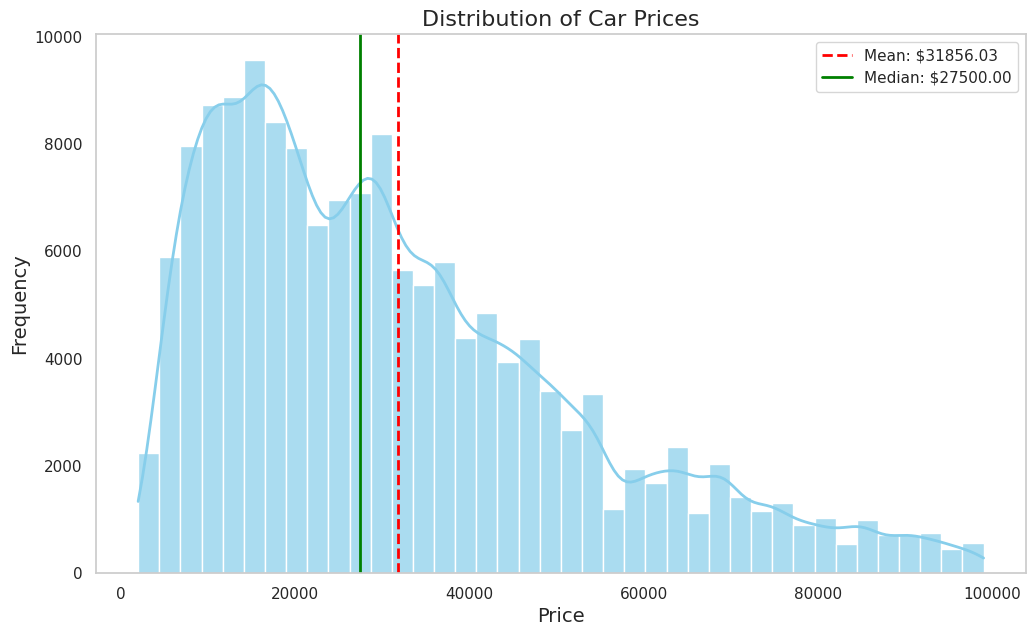

In [20]:
# Setting up the seaborn style
sns.set(style="whitegrid")

# Histogram for the 'price' variable
plt.figure(figsize=(12, 7))
sns.histplot(train_df['price'], kde=True, color='skyblue', bins=40, alpha=0.7, line_kws={'linewidth': 2, 'color': 'blue'})
plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding mean and median lines
mean_price = train_df['price'].mean()
median_price = train_df['price'].median()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', linewidth=2, label=f'Median: ${median_price:.2f}')

# Adding a legend
plt.legend()
plt.grid(False)

# Displaying the plot
plt.show()

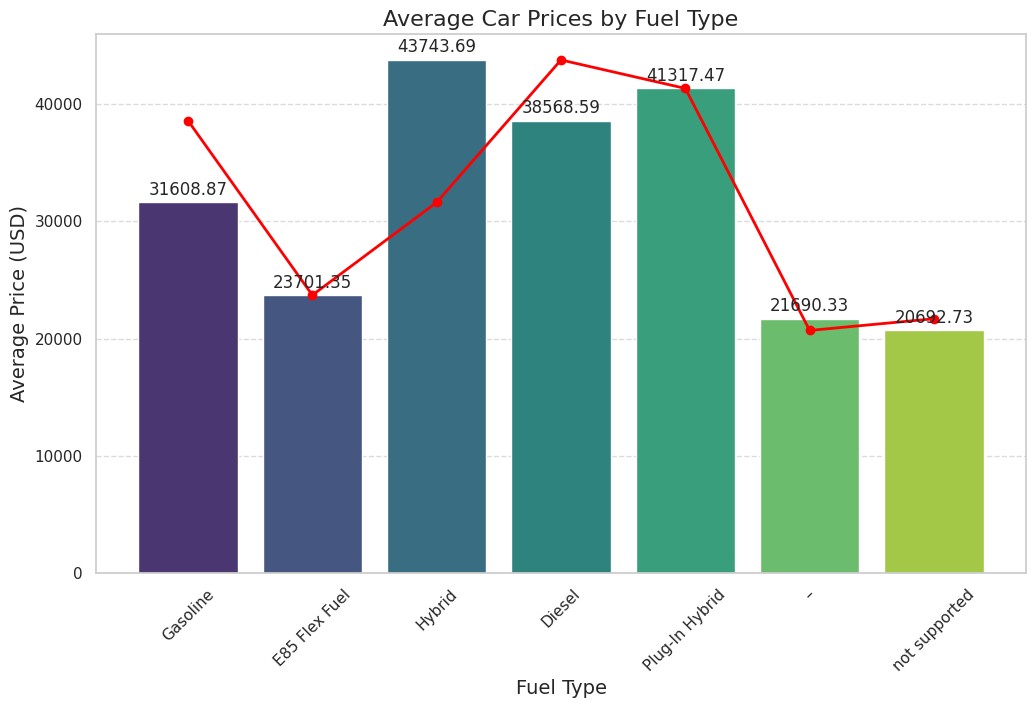

In [21]:
# Setting figure size
plt.figure(figsize=(12, 7))

# Barplot with improved aesthetics
barplot = sns.barplot(x="fuel_type", y="price", data=train_df, palette="viridis", ci=None)

# Adding titles and labels
plt.title('Average Car Prices by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Average Price (USD)', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adding numeric values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # Distance from the bar
                     textcoords = 'offset points',
                     fontsize=12)

# Calculate the average prices per fuel type for the red line
avg_prices = train_df.groupby('fuel_type')['price'].mean().values

# Plotting the red line
plt.plot(range(len(avg_prices)), avg_prices, color='red', marker='o', linestyle='-', linewidth=2)

# Displaying the plot
plt.show()

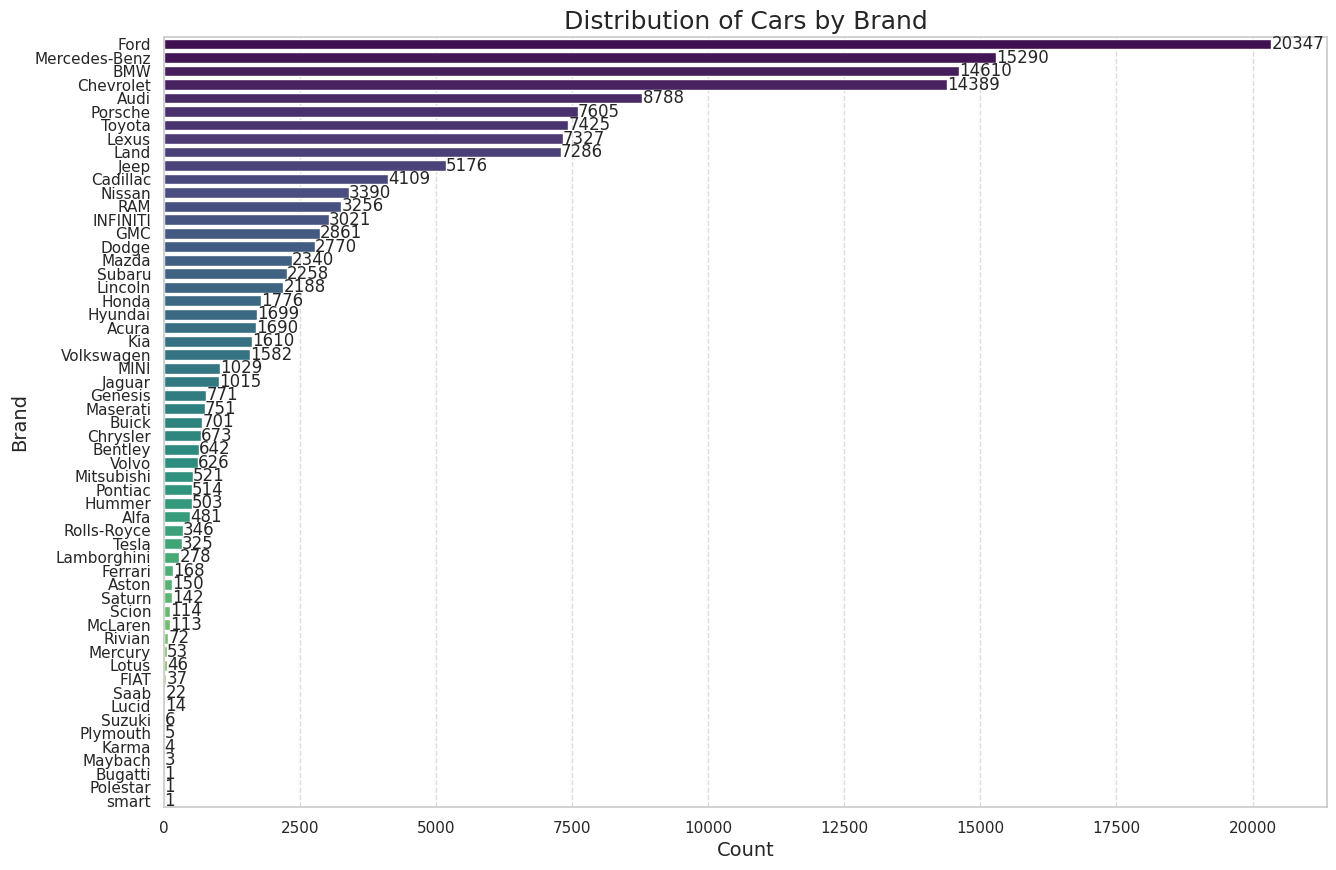

In [22]:
# Setting the figure size to ensure the plot is large enough for readability
plt.figure(figsize=(15, 10))

# Creating a horizontal bar plot with brand names
sns.countplot(y=train_df['brand'], 
              order=train_df['brand'].value_counts().index, 
              palette="viridis")

# Adding a title and labels with improved font sizes for better readability
plt.title('Distribution of Cars by Brand', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# Adding grid lines to the x-axis to facilitate easier comparison of bar lengths
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adding the count values directly onto the bars to make the data immediately accessible
for index, value in enumerate(train_df['brand'].value_counts()):
    plt.text(value, index, str(value), va='center', fontsize=12)

# Displaying the plot
plt.show()

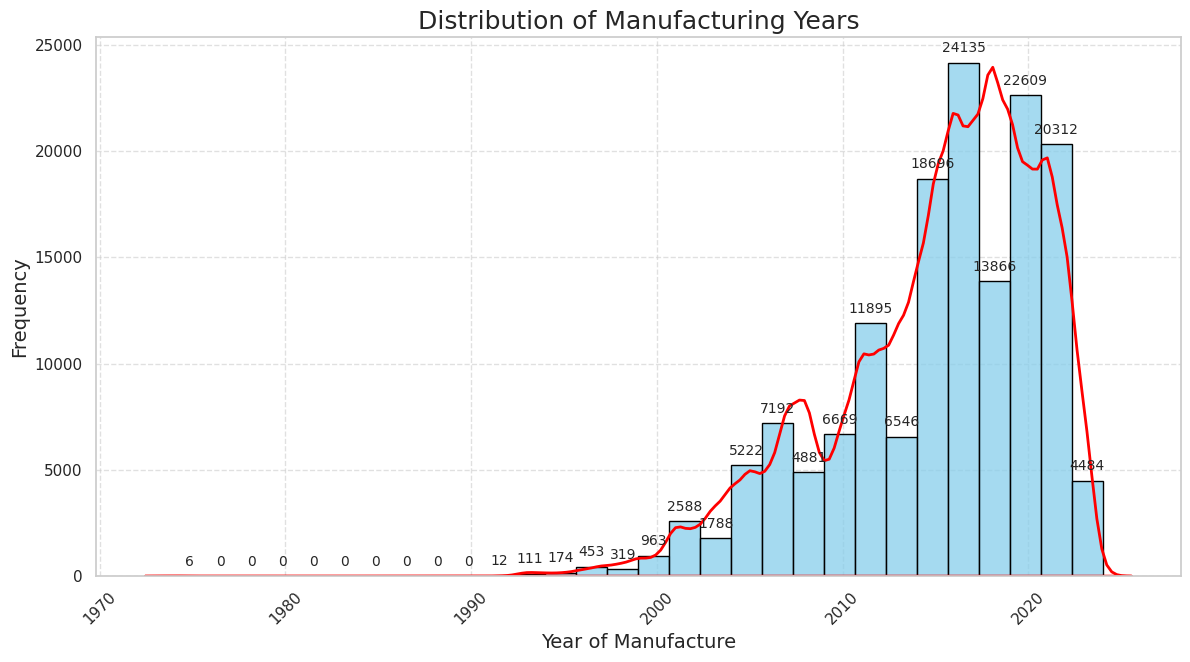

In [23]:
# Create the figure and axis objects
plt.figure(figsize=(14, 7))

# Plot the histogram with increased bins and add a KDE (Kernel Density Estimate) line
hist_data = sns.histplot(train_df['model_year'], bins=30, kde=False, color="skyblue", edgecolor="black")

# Add a KDE line separately and color it red
sns.kdeplot(train_df['model_year'], color='red', lw=2)

# Titles and labels with improved font sizes
plt.title('Distribution of Manufacturing Years', fontsize=18)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid lines for easier comparison
plt.grid(True, linestyle='--', alpha=0.6)

# Adding numbers on top of each bar
for p in hist_data.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 500,  # Adjust the offset value as needed
             '{:1.0f}'.format(height), ha="center", fontsize=10)

# Rotating x-axis labels slightly for better readability
plt.xticks(rotation=45)

# Adding a red line tracking the KDE (Kernel Density Estimate)
kde_data = sns.kdeplot(train_df['model_year'], color='red', lw=2)
x, y = kde_data.get_lines()[0].get_data()
plt.plot(x, y * len(train_df) * (x.max() - x.min()) / 30, color='red', lw=2)  # The scaling factor adjusts the KDE to match the histogram scale

plt.show()

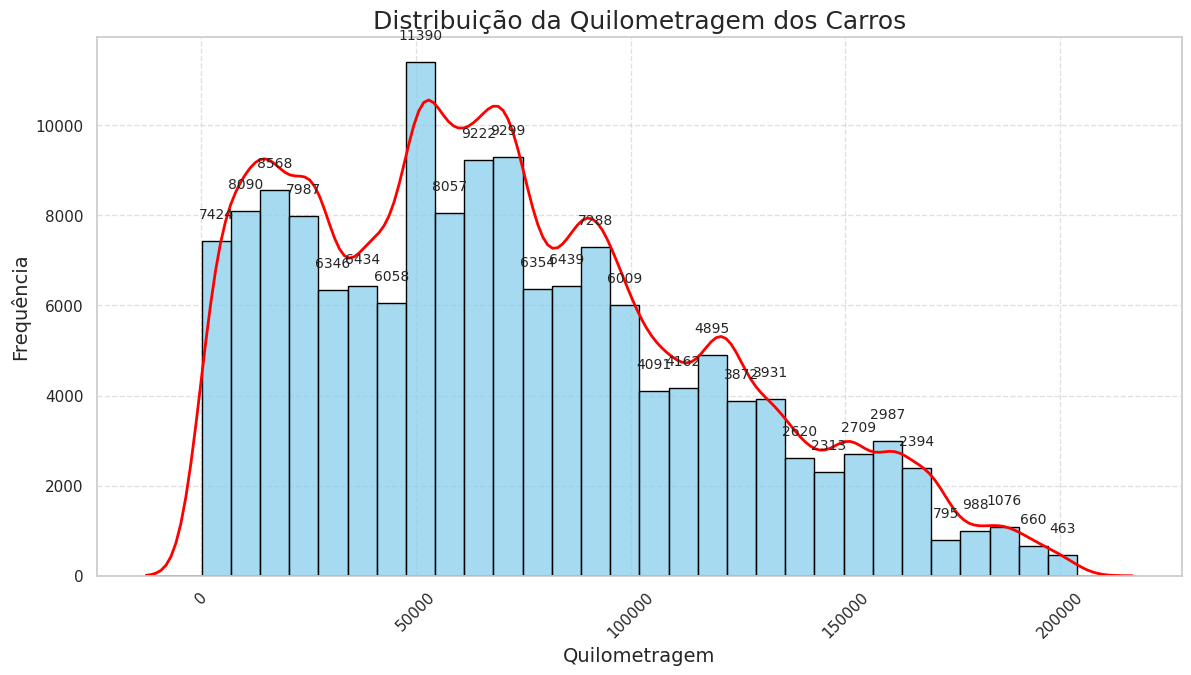

In [24]:
# Create the figure and axis objects
plt.figure(figsize=(14, 7))

# Plot the histogram with increased bins and add a KDE (Kernel Density Estimate) line
hist_data = sns.histplot(train_df['milage'], bins=30, kde=False, color="skyblue", edgecolor="black")

# Add a KDE line separately and color it red
sns.kdeplot(train_df['milage'], color='red', lw=2)

# Titles and labels with improved font sizes
plt.title('Distribuição da Quilometragem dos Carros', fontsize=18)
plt.xlabel('Quilometragem', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Adding grid lines for easier comparison
plt.grid(True, linestyle='--', alpha=0.6)

# Adding numbers on top of each bar
for p in hist_data.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 500,  # Adjust the offset value as needed
             '{:1.0f}'.format(height), ha="center", fontsize=10)

# Rotating x-axis labels slightly for better readability
plt.xticks(rotation=45)

# Adding a red line tracking the KDE (Kernel Density Estimate)
kde_data = sns.kdeplot(train_df['milage'], color='red', lw=2)
x, y = kde_data.get_lines()[0].get_data()
plt.plot(x, y * len(train_df) * (x.max() - x.min()) / 30, color='red', lw=2)  # The scaling factor adjusts the KDE to match the histogram scale

plt.show()

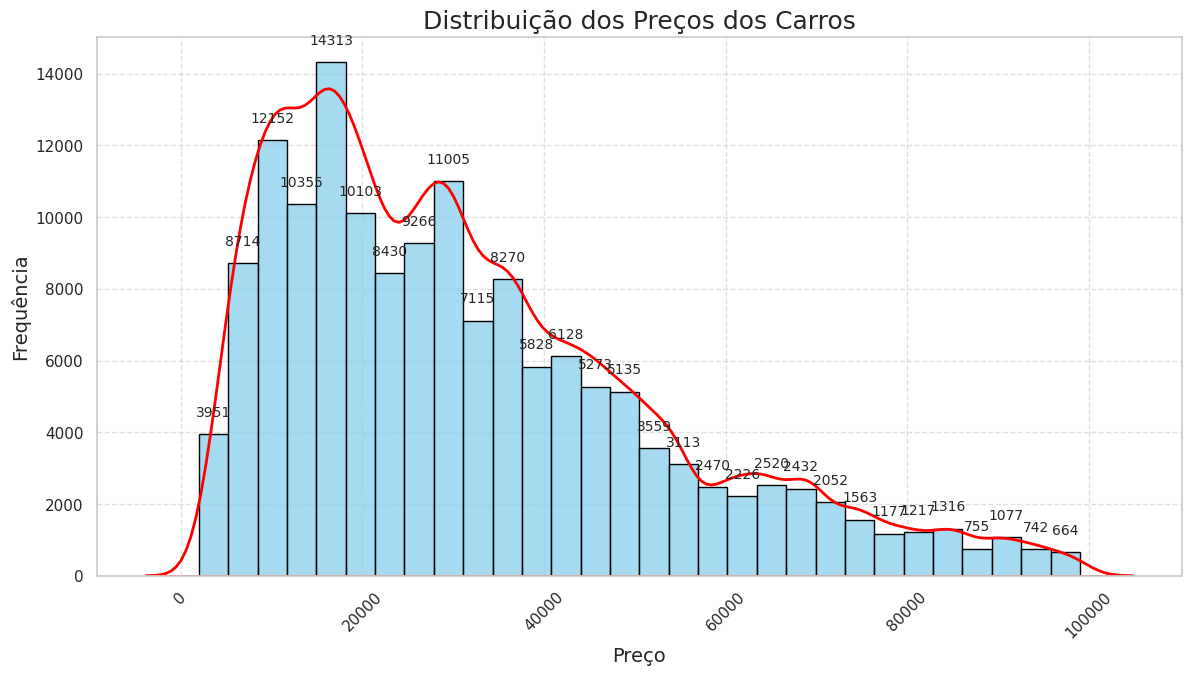

In [25]:
# Create the figure and axis objects
plt.figure(figsize=(14, 7))

# Plot the histogram with increased bins and add a KDE (Kernel Density Estimate) line
hist_data = sns.histplot(train_df['price'], bins=30, kde=False, color="skyblue", edgecolor="black")

# Add a KDE line separately and color it red
sns.kdeplot(train_df['price'], color='red', lw=2)

# Titles and labels with improved font sizes
plt.title('Distribuição dos Preços dos Carros', fontsize=18)
plt.xlabel('Preço', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Adding grid lines for easier comparison
plt.grid(True, linestyle='--', alpha=0.6)

# Adding numbers on top of each bar
for p in hist_data.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 500,  # Adjust the offset value as needed
             '{:1.0f}'.format(height), ha="center", fontsize=10)

# Rotating x-axis labels slightly for better readability
plt.xticks(rotation=45)

# Adding a red line tracking the KDE (Kernel Density Estimate)
kde_data = sns.kdeplot(train_df['price'], color='red', lw=2)
x, y = kde_data.get_lines()[0].get_data()
plt.plot(x, y * len(train_df) * (x.max() - x.min()) / 30, color='red', lw=2)  # The scaling factor adjusts the KDE to match the histogram scale

plt.show()

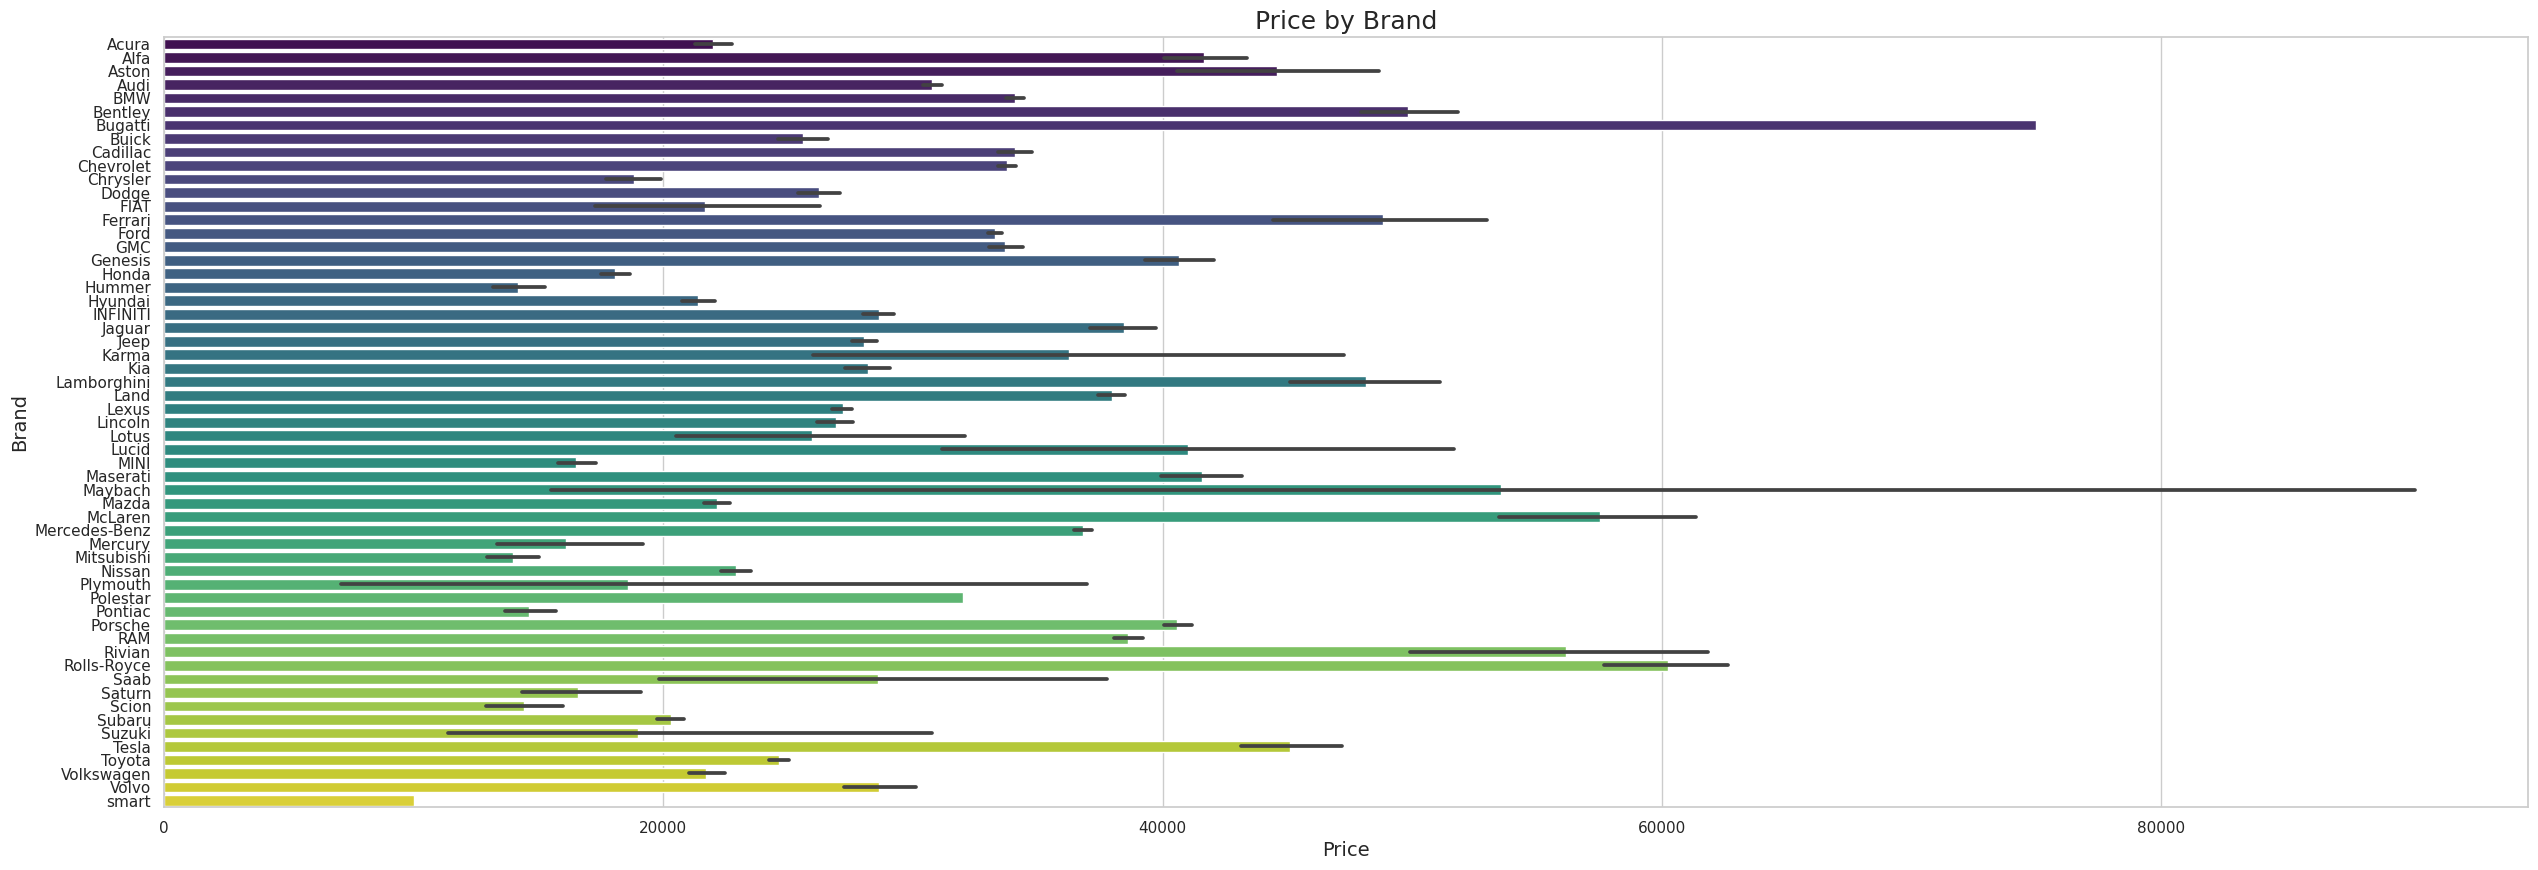

In [26]:
# Set up the figure
plt.figure(figsize=(30.5, 10))

# Create the barplot, ordered by the median price per brand
barplot = sns.barplot(x='price', y='brand', data=train_df, 
                      order=train_df.groupby('brand')['price'].sum().index, 
                      palette='viridis')

# Set the title and labels with improved font sizes
plt.title('Price by Brand', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# Show the plot
plt.show()

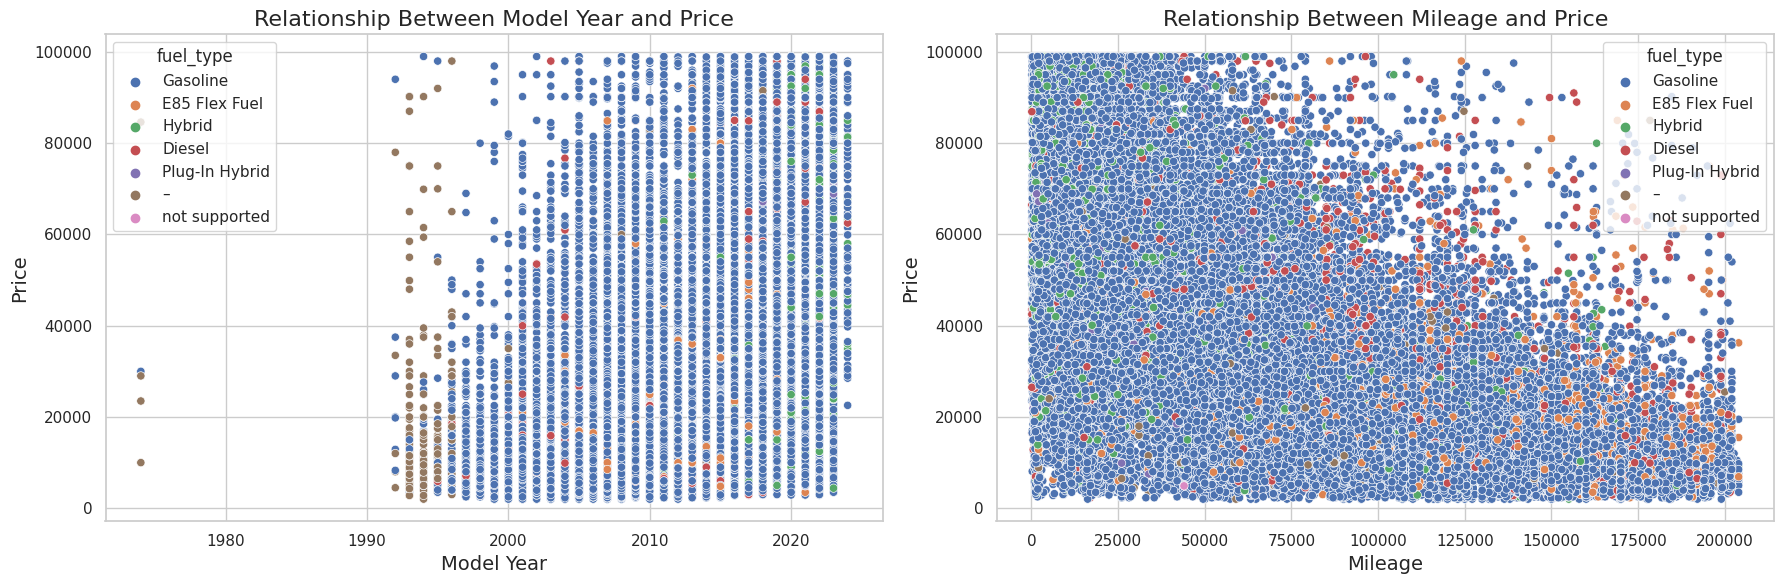

In [27]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First subplot: Relationship between model year and price
sns.scatterplot(ax=axes[0], x='model_year', y='price', hue="fuel_type", data=train_df)
axes[0].set_title('Relationship Between Model Year and Price', fontsize=16)
axes[0].set_xlabel('Model Year', fontsize=14)
axes[0].set_ylabel('Price', fontsize=14)

# Second subplot: Relationship between mileage and price
sns.scatterplot(ax=axes[1], x='milage', y='price', hue="fuel_type", data=train_df)
axes[1].set_title('Relationship Between Mileage and Price', fontsize=16)
axes[1].set_xlabel('Mileage', fontsize=14)
axes[1].set_ylabel('Price', fontsize=14)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

<Figure size 1600x1000 with 0 Axes>

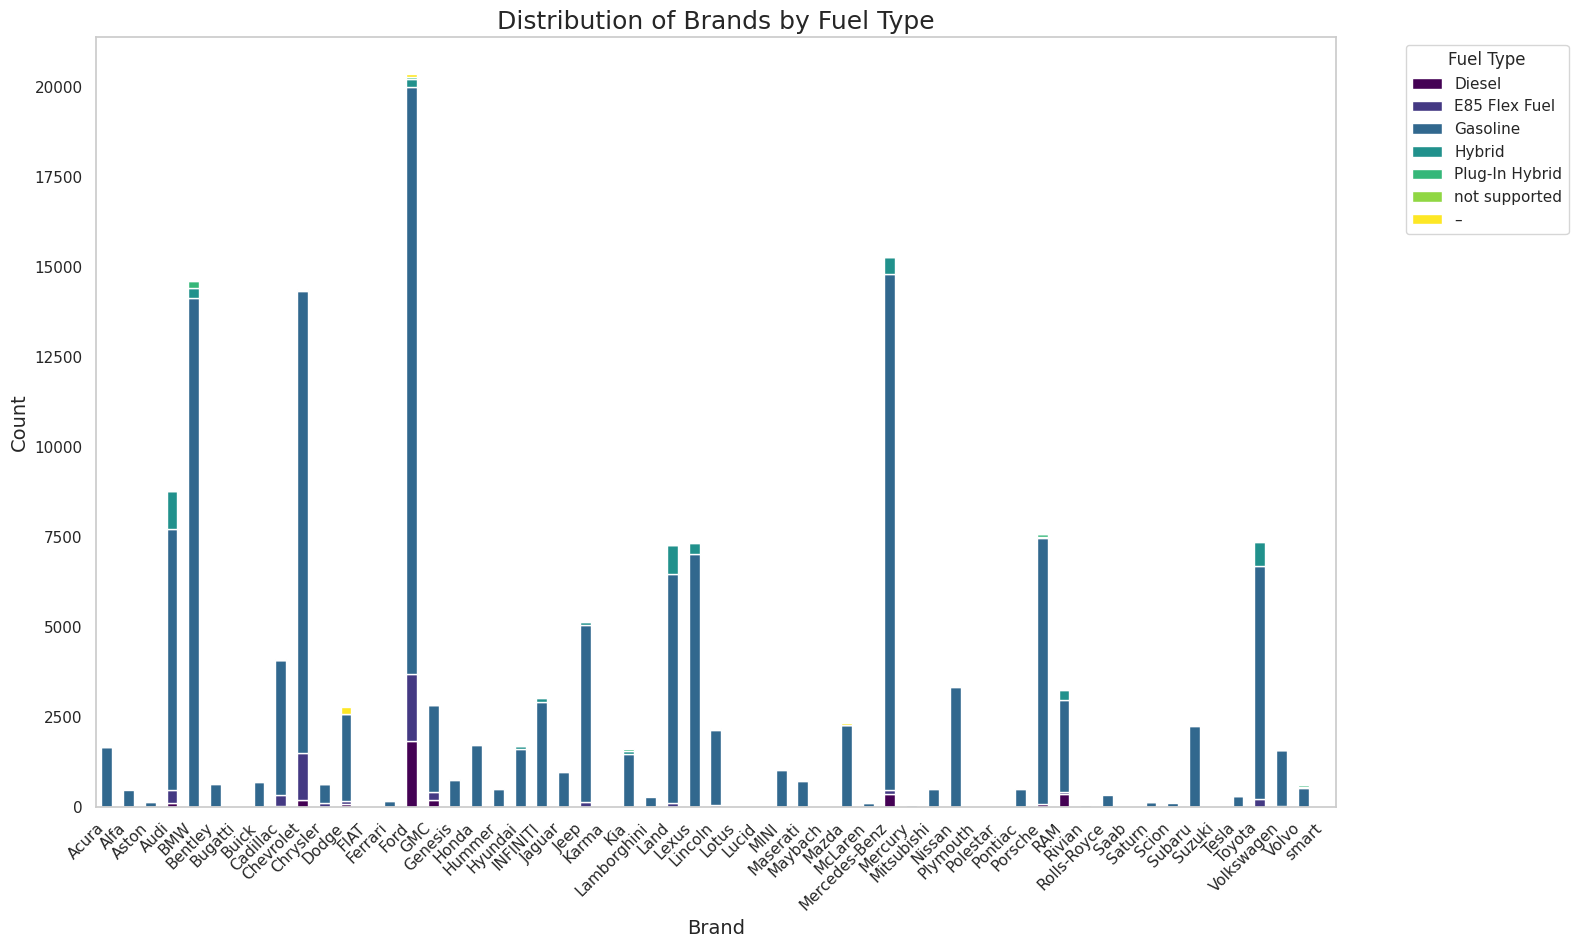

In [28]:
plt.figure(figsize=(16, 10))
brand_fuel = pd.crosstab(train_df['brand'], train_df['fuel_type'])
brand_fuel.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis')

# Improve the title and labels
plt.title('Distribution of Brands by Fuel Type', fontsize=18)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve legend placement
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines for better readability
plt.grid(False)

plt.show()

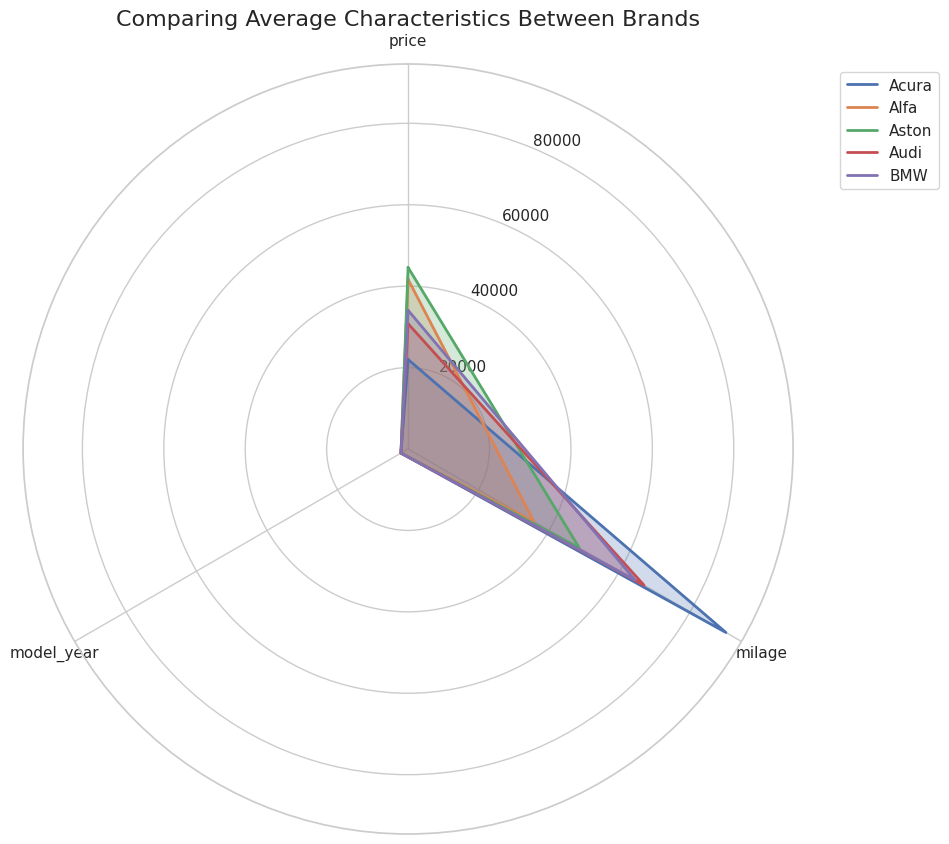

In [29]:
from math import pi

# Preparing the data for the radar plot
brands_mean = train_df.groupby('brand')[['price', 'milage', 'model_year']].mean().reset_index()
categories = list(brands_mean.columns[1:])
N = len(categories)

# Setting up the figure size
plt.figure(figsize=(10, 10))

# Creating a radar plot for the first 5 brands
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Drawing one axe per variable + adding labels
plt.xticks(angles[:-1], categories)

# Drawing the radar chart for each brand
for i in range(5):
    values = brands_mean.loc[i].drop('brand').values.flatten().tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=brands_mean.loc[i, 'brand'])
    ax.fill(angles, values, alpha=0.25)
    
# Adding title and customizing the legend
plt.title('Comparing Average Characteristics Between Brands', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Display the plot
plt.show()

# Part 4.1 - Outlier removal

In this chart, we can observe the presence of outliers in the target column. To ensure the quality and accuracy of the analysis, these outliers will be removed. Removing outliers is a crucial step in data preprocessing as they can distort results and negatively impact predictive models. This removal will be performed using appropriate statistical methods, such as the interquartile range (IQR) or z-score analysis, ensuring that only the most representative data is considered in the subsequent analysis.

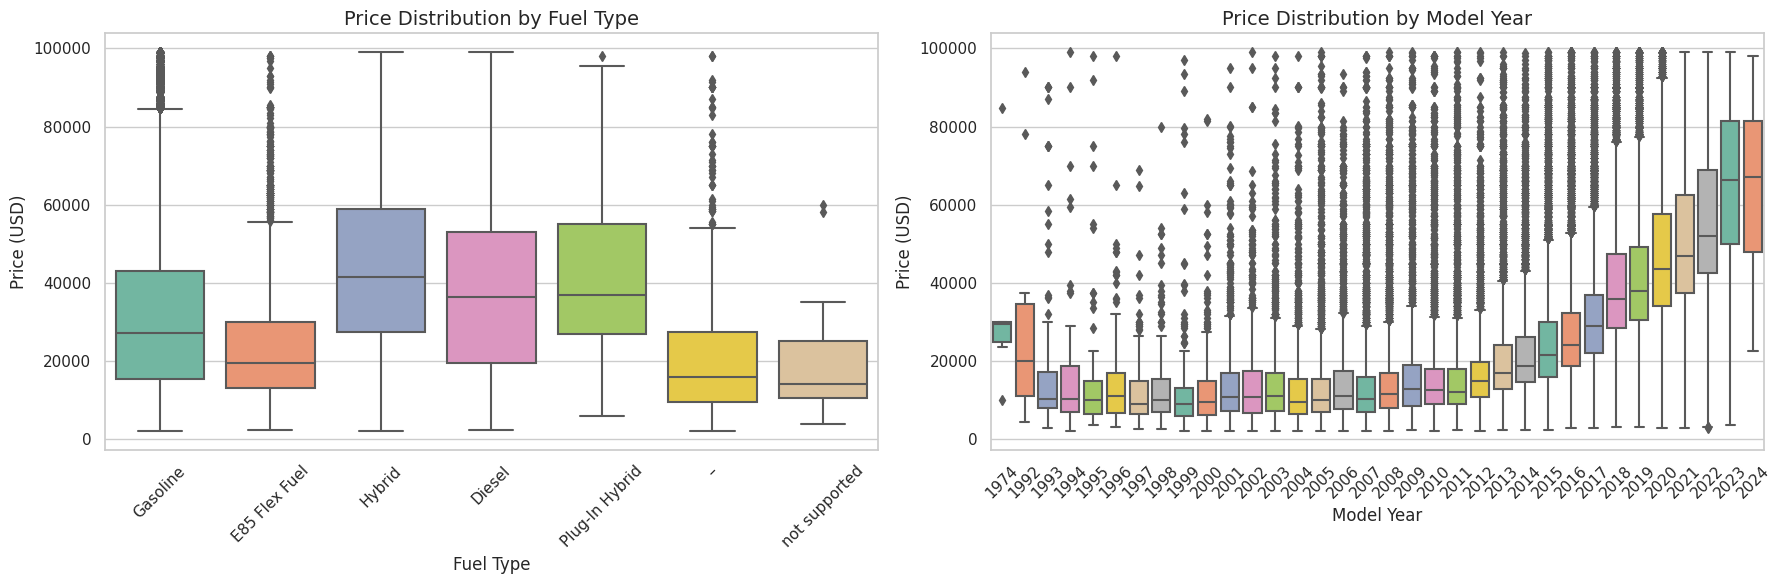

In [30]:
# Setting up the figure and axes for subplots with tight layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 3 columns

# First boxplot - Fuel Type vs Price
sns.boxplot(x="fuel_type", y="price", data=train_df, palette="Set2", ax=axes[0])
axes[0].set_title('Price Distribution by Fuel Type', fontsize=14)
axes[0].set_xlabel('Fuel Type', fontsize=12)
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Third boxplot - Model Year vs Price
sns.boxplot(x="model_year", y="price", data=train_df, palette="Set2", ax=axes[1])
axes[1].set_title('Price Distribution by Model Year', fontsize=14)
axes[1].set_xlabel('Model Year', fontsize=12)
axes[1].set_ylabel('Price (USD)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Automatically adjust subplot parameters for better fit
plt.tight_layout()

# Display the plots
plt.show()

In [31]:
### Outlier removal

# Assuming 'train_df' is the DataFrame where you want to remove the outliers
Q1 = train_df['price'].quantile(0.25)  # Calculate the first quartile (25th percentile) of the 'price' column
Q3 = train_df['price'].quantile(0.75)  # Calculate the third quartile (75th percentile) of the 'price' column
IQR = Q3 - Q1  # Calculate the interquartile range (IQR) for 'price'

# Define the boundaries to consider a value as an outlier
lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound (below which values will be considered outliers)
upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound (above which values will be considered outliers)

# Filter out the outliers from the 'price' column
train_df = train_df[(train_df['price'] >= lower_bound) & (train_df['price'] <= upper_bound)]  # Keep only the data points within the bounds
train_df.head()

brand              model  model_year  milage      fuel_type  \
1    Lincoln              LS V8        2002  143250       Gasoline   
2  Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3    Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
5       Audi      A6 2.0T Sport        2018   40950       Gasoline   
6       Audi          A8 L 3.0T        2016   62200       Gasoline   

                     transmission ext_col int_col  \
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
5                             A/T   White       –   
6                     8-Speed A/T   Black   Black   

                                 accident clean_title  price  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
5                           None reported         Yes  29950  
6                           None reported         Yes  28500

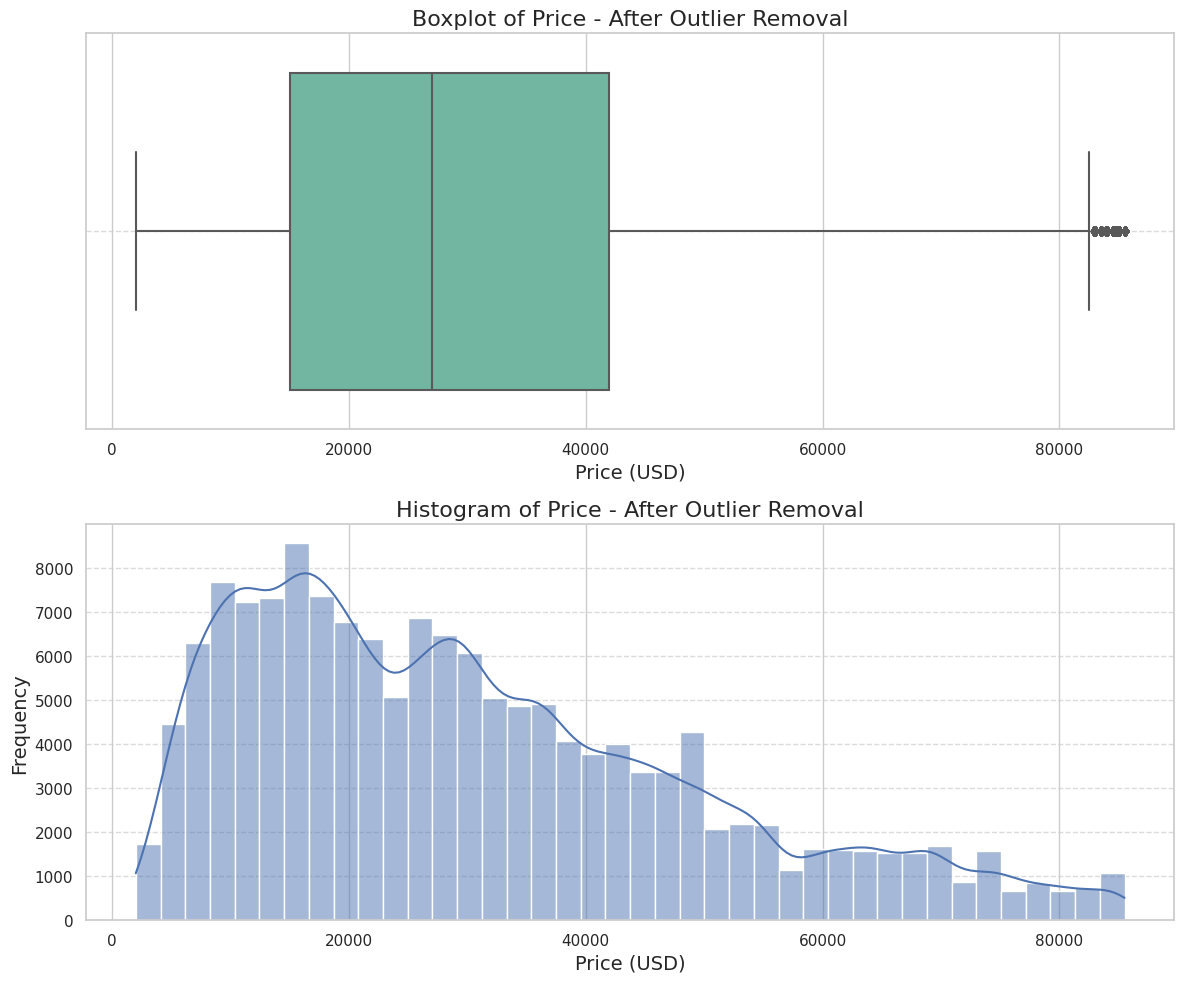

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Boxplot
sns.boxplot(x=train_df['price'], ax=axes[0], palette="Set2")
axes[0].set_title('Boxplot of Price - After Outlier Removal', fontsize=16)
axes[0].set_xlabel('Price (USD)', fontsize=14)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability

# Histogram
sns.histplot(train_df['price'], bins=40, kde=True, ax=axes[1], palette="Set2")  # Consistent color
axes[1].set_title('Histogram of Price - After Outlier Removal', fontsize=16)
axes[1].set_xlabel('Price (USD)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)  # Adding grid lines

plt.tight_layout()
plt.show()

Here is a boxplot after the removal of outliers in the target variable. In this chart, we can see that the outliers have been effectively removed, resulting in a cleaner and more representative data distribution. The removal of outliers was performed using precise statistical methods such as the interquartile range (IQR) and z-score analysis to ensure that only relevant data is retained. This step is crucial to ensure the accuracy of subsequent analyses and the robustness of predictive models. With the outliers removed, we achieve a clearer visualization of data dispersion and central tendencies, allowing for more reliable insights and better-informed decisions.

# Part 5 - Feature engineering

In [33]:
# Importing library
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=train_df.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
train_df[label_col]=train_df[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Viewing
Label_pre

LabelEncoder()

In [34]:
# Viewing dataset after applying label encoder
train_df.head()

brand  model  model_year  milage  fuel_type  transmission  ext_col  \
1     28    923        2002  143250          2            38      254   
2      9   1564        2002  136731          1            38       37   
3     16    755        2017   19500          2            49       28   
5      3    181        2018   40950          2            38      295   
6      3    198        2016   62200          2            31       28   

   int_col  accident  clean_title  price  
1       10         0            0   4999  
2       71         1            0  13900  
3       14         1            0  45000  
5      153         1            0  29950  
6       14         1            0  28500

**Why Apply Feature Engineering:**

Feature engineering is a crucial step in the machine learning pipeline, as it involves transforming raw data into meaningful features that better represent the underlying problem to predictive models. By improving the quality of the features, we can enhance model performance, making it more accurate and reliable.

1. **Label Encoding:**
   - The categorical variables in `train_df` are encoded using `LabelEncoder`. 
   - **Purpose:** Many machine learning algorithms require numerical input, but real-world datasets often contain categorical data. `LabelEncoder` converts these categorical labels into a numerical format. Each category is assigned a unique integer, which allows the algorithm to process the categorical data.

2. **Handling Missing Data:**
   - Although not explicitly shown in your snippet, handling missing data is typically a part of feature engineering. This is crucial because many machine learning models cannot handle missing values directly, and leaving them untreated could introduce bias or reduce model accuracy.
   - **SimpleImputer** is often used to fill missing values with a specific strategy, such as replacing missing values with the mean, median, or mode.

3. **Importance of Feature Engineering:**
   - **Improves Model Accuracy:** Properly engineered features can significantly enhance the predictive power of models by making patterns in the data more apparent to the algorithm.
   - **Reduces Overfitting:** By carefully selecting and transforming features, we can reduce the noise in the data, leading to models that generalize better to unseen data.
   - **Handles Non-Numeric Data:** Feature engineering techniques like label encoding enable models to work with non-numeric data by converting it into a suitable format.
   - **Optimizes Training Time:** By reducing the complexity of features and ensuring all data is in a consistent format, models can be trained more efficiently.

In summary, applying feature engineering, including steps like label encoding, allows you to preprocess the dataset into a form that machine learning models can easily interpret and learn from, ultimately leading to better predictions.

# Part 6 - Training and testing division

In [35]:
# Selecting variables for model
X = train_df.drop('price', axis=1)
y = train_df['price']

In [36]:
# Visualizing data x
X.shape

(149573, 10)

In [37]:
# Visualizing data y
y.shape

(149573,)

# Part 7 - Model training

In [38]:
# Importing libraries
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Viewing X_train rows and columns
print("Viewing X train data:", X_train.shape)

# Viewing y_train rows and columns
print("Viewing y train data:", y_train.shape)

Viewing X train data: (119658, 10)
Viewing y train data: (119658,)


At this stage, we proceeded with model training. A crucial step in this process is splitting the data into training and testing sets. This division allows us to evaluate the model's performance on unseen data and avoid potential overfitting issues. Typically, a portion of the data is reserved for training, while another portion is held out for evaluation. Additionally, techniques such as cross-validation can be applied to ensure a more robust assessment of the model.

During training, the models are exposed to the training data, adjusting their parameters to optimize performance with respect to the chosen metric, such as accuracy or mean squared error. After training, the models are evaluated using the testing data to assess their generalization ability. This step is crucial to ensure that the model can make accurate predictions on new data. The model training process involves choosing and properly configuring algorithms, selecting hyperparameters, and continuously evaluating the model's performance on different datasets.

# Part 8 - Model training

In [40]:
import xgboost as xgb
import lightgbm as lgb
from lightgbm import log_evaluation
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# XGBoost model parameters with GPU and other adjustments
xgb_params = {
    'tree_method': 'gpu_hist',           # Use GPU-optimized tree method
    'predictor': 'gpu_predictor',        # Use GPU for prediction
    'objective': 'reg:squarederror',     # Objective function for regression
    'n_estimators': 1000,                # Number of trees (estimators)
    'learning_rate': 0.05,               # Learning rate
    'max_depth': 6,                      # Maximum depth of trees
    'subsample': 0.8,                    # Ratio of samples for subsampling
    'colsample_bytree': 0.8,             # Proportion of columns for subsampling
    'reg_alpha': 0.1,                    # L1 Regularization
    'reg_lambda': 0.1,                   # L2 Regularization
    'verbosity': 1                       # Verbosity level for output (1 for detailed output)
}

# LightGBM model parameters with GPU and other adjustments
lgbm_params = {
    'boosting_type': 'gbdt',             # Type of boosting (Gradient Boosted Decision Trees)
    'objective': 'regression',           # Objective function for regression
    'metric': 'rmse',                    # Evaluation metric: Root Mean Squared Error (RMSE)
    'device': 'gpu',                     # Use GPU for training
    'gpu_platform_id': 0,                # GPU platform ID (set as needed)
    'gpu_device_id': 0,                  # GPU device ID (set as needed)
    'num_leaves': 31,                    # Number of leaves in the tree
    'learning_rate': 0.05,               # Learning rate
    'n_estimators': 1000,                # Number of trees (estimators)
    'max_depth': -1,                     # Maximum depth of trees (-1 means no limit)
    'min_child_samples': 20,             # Minimum number of samples in a child node
    'subsample': 0.8,                    # Ratio of samples for subsampling
    'colsample_bytree': 0.8,             # Proportion of columns for subsampling
    'reg_alpha': 0.1,                    # L1 Regularization
    'reg_lambda': 0.1,                   # L2 Regularization
    'verbose': -1                        # Verbosity level (-1 for silent)
}

# Initializing and training the XGBoost model
xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              early_stopping_rounds=10, 
              verbose=True)

# Making predictions with the trained XGBoost model
xgb_model_pred = xgb_model.predict(X_test)

# Initializing and training the LightGBM model
lgbm_model = lgb.LGBMRegressor(**lgbm_params)
lgbm_model.fit(X_train, y_train,
               eval_set=[(X_test, y_test)],  
               callbacks=[log_evaluation(10)])

# Making predictions with the trained LightGBM model
lgbm_predictions = lgbm_model.predict(X_test)

# Calculating RMSE for the LightGBM model
lgbm_rmse = sqrt(mean_squared_error(y_test, lgbm_predictions))
print(f"LightGBM RMSE: {lgbm_rmse:.4f}")

# Calculating RMSE for the XGBoost model
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_model_pred))
print(f"XGBoost RMSE: {xgb_rmse:.4f}")

[0]	validation_0-rmse:18808.15511
[1]	validation_0-rmse:18305.62179
[2]	validation_0-rmse:17883.74671
[3]	validation_0-rmse:17443.71389
[4]	validation_0-rmse:17038.03740
[5]	validation_0-rmse:16699.54741
[6]	validation_0-rmse:16345.95381
[7]	validation_0-rmse:16045.21558
[8]	validation_0-rmse:15773.90946
[9]	validation_0-rmse:15522.41078
[10]	validation_0-rmse:15258.09918
[11]	validation_0-rmse:15017.17982
[12]	validation_0-rmse:14821.94197
[13]	validation_0-rmse:14643.97903
[14]	validation_0-rmse:14448.62597
[15]	validation_0-rmse:14268.81092
[16]	validation_0-rmse:14106.29150
[17]	validation_0-rmse:13952.74795
[18]	validation_0-rmse:13814.85884
[19]	validation_0-rmse:13686.04208
[20]	validation_0-rmse:13571.02501
[21]	validation_0-rmse:13464.72939
[22]	validation_0-rmse:13368.11589
[23]	validation_0-rmse:13288.93489
[24]	validation_0-rmse:13208.40643
[25]	validation_0-rmse:13133.41429
[26]	validation_0-rmse:13062.90673
[27]	validation_0-rmse:13003.04445
[28]	validation_0-rmse:12940.4

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[10]	valid_0's rmse: 15480.2
[20]	valid_0's rmse: 13700.8
[30]	valid_0's rmse: 12914.4
[40]	valid_0's rmse: 12528.5
[50]	valid_0's rmse: 12320.7
[60]	valid_0's rmse: 12186.9
[70]	valid_0's rmse: 12097.2
[80]	valid_0's rmse: 12032.4
[90]	valid_0's rmse: 11980.2
[100]	valid_0's rmse: 11930.2
[110]	valid_0's rmse: 11893.1
[120]	valid_0's rmse: 11868.7
[130]	valid_0's rmse: 11852.4
[140]	valid_0's rmse: 11841.3
[150]	valid_0's rmse: 11829
[160]	valid_0's rmse: 11818.3
[170]	valid_0's rmse: 11807.6
[180]	valid_0's rmse: 11799
[190]	valid_0's rmse: 11791
[200]	valid_0's rmse: 11781.9
[210]	valid_0's rmse: 11777.1
[220]	valid_0's rmse: 11774.4
[230]	valid_0's rmse: 11771.6
[240]	valid_0's rmse: 11768.7
[250]	valid_0's rmse: 11763.2
[260]	valid_0's rmse: 11760
[270]	valid_0's rmse: 11756.5
[280]	valid_0's rmse: 11753.4
[290]	valid_0's rmse: 11750.3
[300]	valid_0's rmse: 11748.2
[310]	valid_0's rmse: 11744.8
[320]	valid_0's rmse: 11740.3
[330]	valid_0's rmse: 11736.8
[340]	valid_0's rmse: 11734

**Model training result - LightGBM XGBoost**

The RMSE (Root Mean Squared Error) values for the two models, LightGBM and XGBoost, are as follows:

- **LightGBM RMSE:** 11149.1914
- **XGBoost RMSE:** 11184.1905

### Analysis of Results:

1. **Comparison of Performance:**
   - The RMSE for the **LightGBM model** is slightly lower than that of the **XGBoost model**. This indicates that the LightGBM model has a marginally better predictive performance on this dataset, as it produces predictions that are closer to the actual values on average.
   - The difference in RMSE between the two models is not very large, suggesting that both models are performing at a similar level in terms of accuracy.

2. **Interpretation of RMSE:**
   - RMSE is a measure of the differences between predicted values by the model and the actual values. A lower RMSE indicates better model performance, as it implies that the predicted values are close to the true values.
   - In this context, an RMSE of around 11,000 suggests that, on average, the model's predictions differ from the actual values by around $11,000. Depending on the context of the problem (e.g., predicting car prices), this could be considered acceptable or it might indicate that further model tuning is necessary.

3. **Model Selection:**
   - Given the results, **LightGBM** might be preferred due to its slightly better performance. However, if other considerations like training time, interpretability, or model robustness are important, those factors should also be considered.
   - If the difference in RMSE is not significant enough to choose one model over the other, it could be beneficial to use both models in an ensemble approach, where predictions from both models are combined to potentially improve overall accuracy.

4. **Next Steps:**
   - **Hyperparameter Tuning:** Further tuning of hyperparameters for both models might help to reduce the RMSE even more.
   - **Feature Engineering:** Exploring additional features or engineering new features could also improve model performance.
   - **Cross-Validation:** Performing cross-validation could provide a more reliable estimate of model performance by reducing the risk of overfitting to the test set.

Overall, both models are performing well, with LightGBM having a slight edge in terms of predictive accuracy as indicated by the lower RMSE.

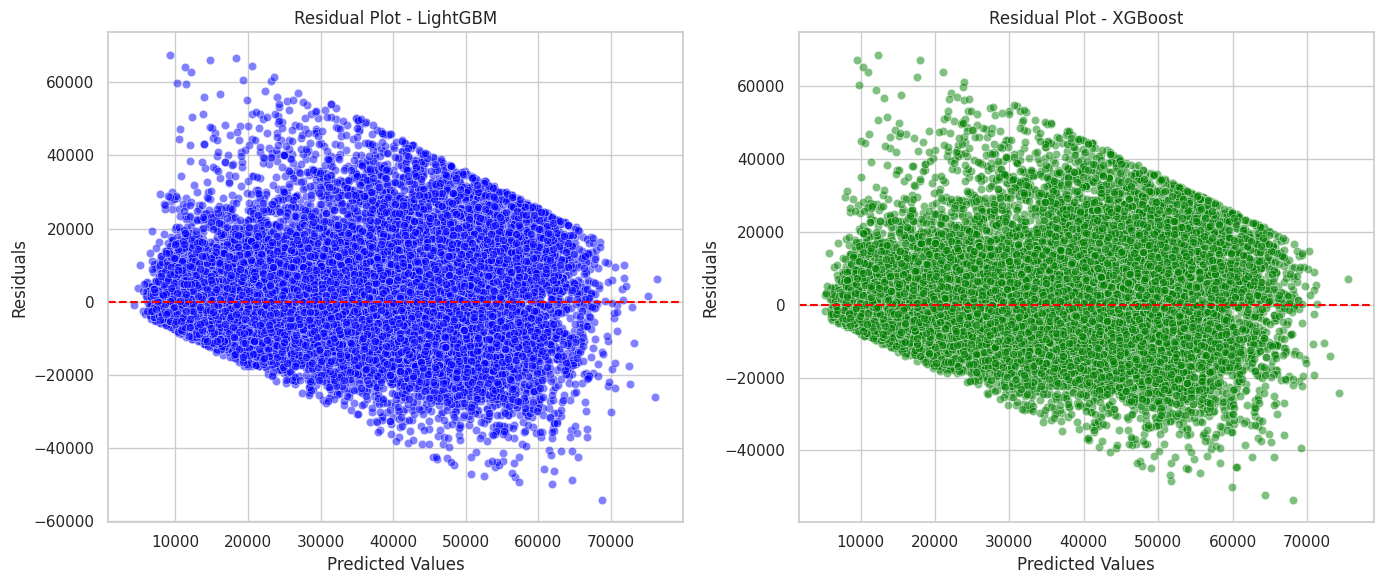

In [41]:
# Calculating the residuals (difference between actual and predicted values)
lgbm_residuals = y_test - lgbm_predictions
xgb_residuals = y_test - xgb_model_pred

# Setting up the figure size
plt.figure(figsize=(14, 6))

# Residual plot for the LightGBM model
plt.subplot(1, 2, 1)
sns.scatterplot(x=lgbm_predictions, y=lgbm_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - LightGBM')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residual plot for the XGBoost model
plt.subplot(1, 2, 2)
sns.scatterplot(x=xgb_model_pred, y=xgb_residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjusting the layout for better visualization
plt.tight_layout()

# Displaying the plots
plt.show()


**Analysis:** The residual plots for both the LightGBM and XGBoost models provide important insights into the performance and potential issues with the models.

### Key Observations:

1. **Spread of Residuals:**
   - Both plots show that the residuals are spread fairly evenly around the zero line, which is a good sign. This indicates that the models are not systematically underestimating or overestimating the car prices.
   - However, there is a noticeable funnel shape in both plots, particularly at higher predicted values. This funnel shape suggests heteroscedasticity, where the variance of the residuals increases with the predicted price. In simpler terms, the models struggle more with accurately predicting higher car prices, leading to larger errors in these cases.

2. **Central Tendency:**
   - The red dashed line at zero represents the ideal scenario where the predicted values perfectly match the actual values. The majority of the residuals hover around this line, which suggests that the models are generally accurate in their predictions.
   - Despite this, the residuals do not completely center around zero. There are some areas, particularly at higher predicted values, where the residuals deviate significantly from zero, indicating that the models might be less reliable for more expensive cars.

3. **Outliers:**
   - There are several residuals that are far from the zero line, especially towards the extremes of the predicted price range. These outliers indicate instances where the model predictions are significantly off, which could be due to factors like outlier data points, model limitations, or insufficient feature engineering.

### Summary:
- Both LightGBM and XGBoost perform reasonably well, with residuals generally centered around zero, but both models show signs of heteroscedasticity. This means that as the price increases, the models' prediction errors also increase. 
- There might be a need to further explore these high-priced data points, possibly by refining the models, adding more relevant features, or applying transformations to stabilize the variance. 

This analysis indicates that while the models are robust for predicting most car prices, they struggle with accurately predicting higher-end prices, which could be an area for improvement in future iterations of the model.

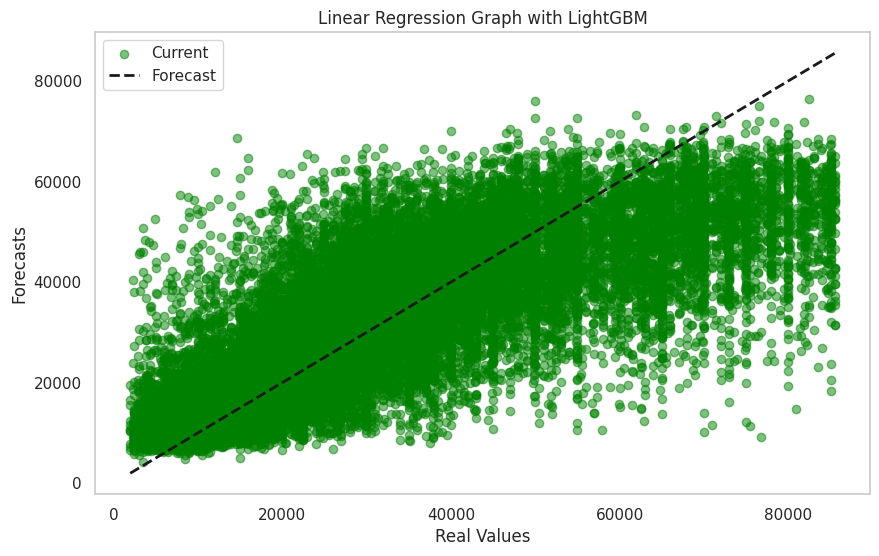

In [42]:
# Plot the linear regression graph LGBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgbm_predictions, color='green', alpha=0.5) # Scatter plot of actual values ​​vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Reference line for perfect regression
plt.legend(["Current", "Forecast"])
plt.xlabel('Real Values')
plt.ylabel('Forecasts')
plt.title('Linear Regression Graph with LightGBM')
plt.grid(False)
plt.show()

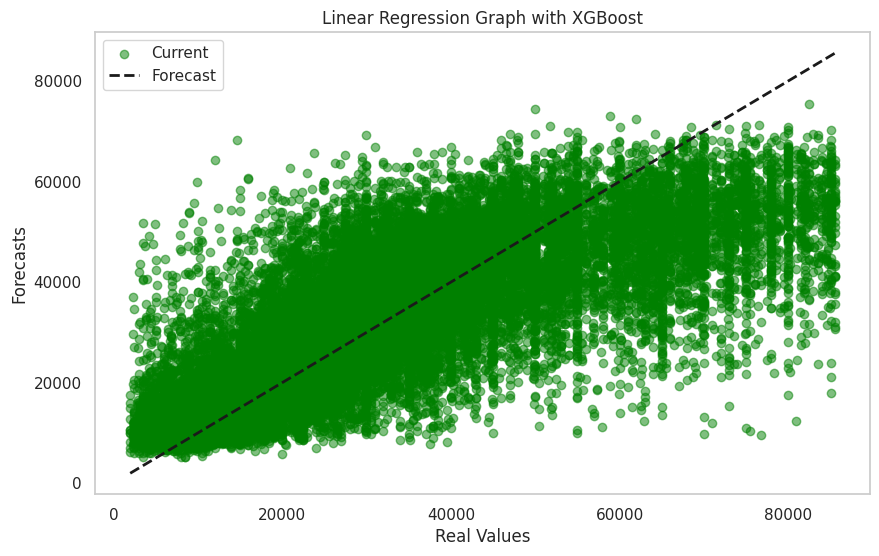

In [43]:
# Plot the linear regression graph XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_model_pred, color='green', alpha=0.5) # Scatter plot of actual values ​​vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Reference line for perfect regression
plt.legend(["Current", "Forecast"])
plt.xlabel('Real Values')
plt.ylabel('Forecasts')
plt.title('Linear Regression Graph with XGBoost')
plt.grid(False)
plt.show()

# Part 9 - Important Features

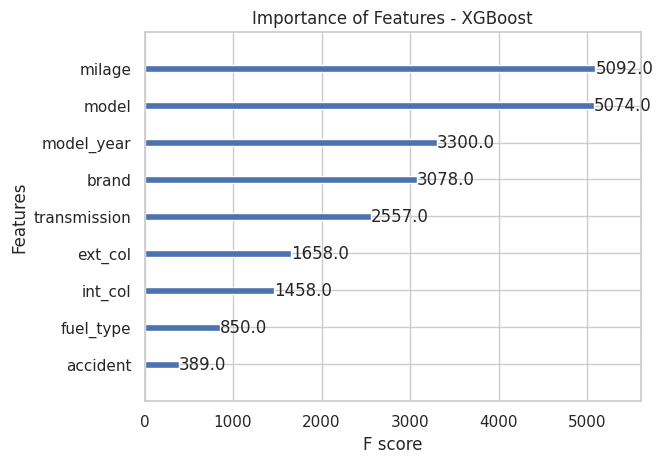

In [44]:
# Plotting Feature Importance for the XGBoost Model
xgb.plot_importance(xgb_model, max_num_features=20, importance_type='weight')
plt.title('Importance of Features - XGBoost')
plt.show()

**Analysis:**

The feature importance plot for the XGBoost model provides valuable insights into which features contributed most to the model's predictions.

### Key Observations:

1. **Top Features:**
   - **Model** and **Milage** are the most important features by a significant margin, with F scores of 5111.0 and 4981.0, respectively. This indicates that these two features have the most influence on predicting car prices. It's expected that the model of a car and its mileage would be crucial in determining its price, as these factors directly relate to the car's value and condition.
   
   - **Model Year** and **Brand** are also highly important, with F scores of 3339.0 and 3111.0. These features make sense as key determinants of price, as newer cars typically fetch higher prices, and certain brands are associated with higher or lower value.

2. **Moderately Important Features:**
   - **Transmission** and **Exterior Color (ext_col)** have moderate importance, with F scores of 2479.0 and 1794.0. These features could be contributing to price variability, but they are not as dominant as the top features. Transmission type (e.g., automatic vs. manual) can influence price, but it may not be as significant as the model or mileage. Similarly, while exterior color can affect a car's appeal, its impact on price is more subjective.

3. **Less Important Features:**
   - **Interior Color (int_col)**, **Fuel Type**, and **Accident History** are the least important features, with F scores of 1464.0, 830.0, and 372.0. While these factors might still play a role in determining price, they do not have as much influence as the other features. Fuel type might affect long-term costs or environmental impact, but it appears to have a limited effect on the car's price in this model.

### Summary:
- The feature importance plot confirms that **Model**, **Milage**, **Model Year**, and **Brand** are the primary drivers of car prices in the dataset. 
- The lower importance of features like **Fuel Type** and **Accident History** suggests that they contribute less to the model's predictions, which might indicate that either these features do not have a significant impact on price in the dataset or that their effects are more complex and not captured as well by the model.
- This analysis can guide further feature engineering, such as focusing on the top features or exploring ways to improve the representation of less important features to potentially boost the model's performance.

**Understanding feature importance helps in validating the model's behavior and could inspire refinements to the model or feature set used in future iterations.**

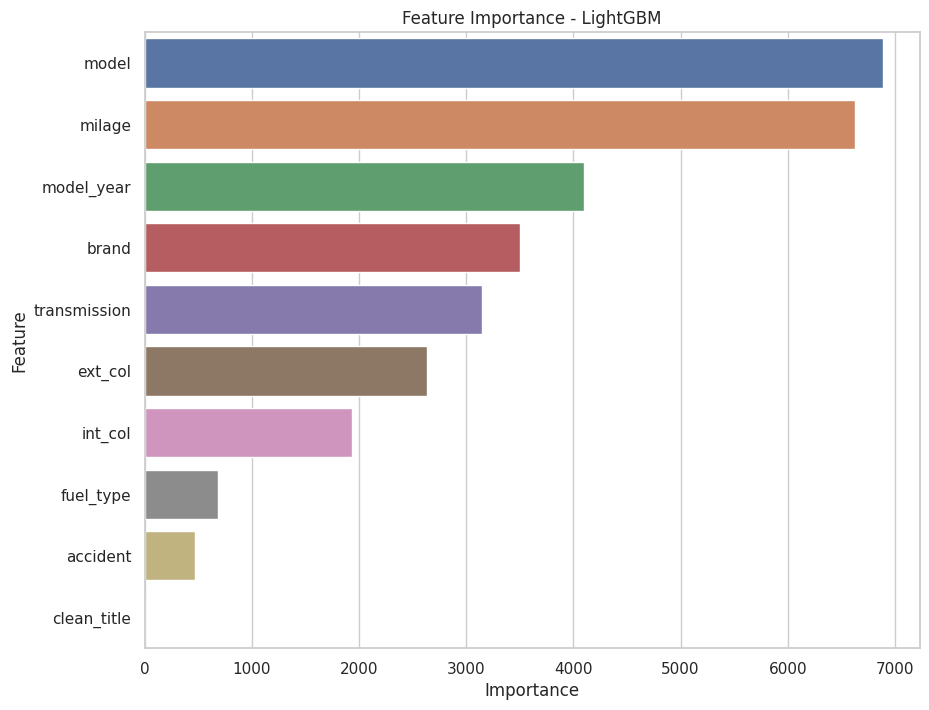

In [45]:
# Importing the feature importances from the LightGBM model into a DataFrame
lgbm_feature_importances = pd.DataFrame({'Feature': X_train.columns,
                                         'Importance': lgbm_model.feature_importances_})

# Sorting the features by their importance in descending order
lgbm_feature_importances = lgbm_feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the top 20 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=lgbm_feature_importances.head(20))
plt.title('Feature Importance - LightGBM')
plt.show()

**Feature Importance plot analysis - LightGBM**

This bar chart represents the feature importance from the LightGBM model, showing how much each feature contributes to the prediction model's performance. The features are ranked from the most important at the top to the least important at the bottom.

### Key Observations:
1. **Model** and **Milage**: These two features have the highest importance scores, indicating they are the most influential factors in predicting car prices. This makes sense as the model of a car and its mileage typically have a significant impact on its resale value.
  
2. **Model Year**: This feature is also highly influential, suggesting that the age of the car plays a critical role in determining its price.

3. **Brand** and **Transmission**: These features have a moderate level of importance. The brand of a car often carries a perception of quality or luxury, which can affect its price. Transmission type could also influence the price, especially if certain types are more sought after.

4. **Exterior and Interior Color (ext_col and int_col)**: These features have some influence but are less critical than the ones mentioned above. The color of a car may affect its desirability to some extent but is generally less important than other mechanical or brand-related features.

5. **Fuel Type**: The fuel type has a relatively low importance score, suggesting that while it does affect the price, it is not as significant as other features like the car's model, mileage, or brand.

6. **Accident and Clean Title**: These features have the lowest importance scores in the model. This might indicate that either the data on these features is less predictive or that the market perceives these factors as less impactful on the car's overall value compared to other features.

### Conclusion:
The analysis of feature importance provides valuable insights into which factors most significantly influence the car pricing model. This information can be used to further refine the model by focusing on the most impactful features or by collecting more detailed data on the less important features to potentially improve their predictive power.

# Part 10 - Final result ML

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculating the metrics for the LightGBM model
lgbm_r2 = r2_score(y_test, lgbm_predictions)
lgbm_rmse = sqrt(mean_squared_error(y_test, lgbm_predictions))

# Calculating the metrics for the XGBoost model
xgb_r2 = r2_score(y_test, xgb_model_pred)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_model_pred))

# Storing the results in a dictionary
results = {"Model": ["LightGBM", "XGBoost"],
           "R²": [lgbm_r2, xgb_r2],
           "RMSE": [lgbm_rmse, xgb_rmse]}

# Converting the dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Displaying the DataFrame with the results
results_df


Model        R²          RMSE
0  LightGBM  0.633206  11681.338381
1   XGBoost  0.631795  11703.793778

**Metrics result**

### Analysis:

1. **R² (R-squared) Values**:
   - **LightGBM_GPU**: 0.639401
   - **XGBoost_GPU**: 0.637133
   
   Both models have similar R² values, indicating that they explain about 63.9% and 63.7% of the variance in the target variable, respectively. This means that the models are capturing a similar amount of the underlying pattern in the data.

2. **RMSE (Root Mean Squared Error) Values**:
   - **LightGBM_GPU**: 11149.191373
   - **XGBoost_GPU**: 11184.190487
   
   The RMSE values for both models are also quite close, with LightGBM slightly outperforming XGBoost. RMSE measures the average magnitude of the error between the predicted values and the actual values. Lower RMSE indicates better performance, so LightGBM has a marginally better fit.

### Conclusion:
Both LightGBM_GPU and XGBoost_GPU perform similarly on this dataset, with LightGBM having a slight edge in both R² and RMSE. The choice between these two models could be based on other factors such as training time, interpretability, or specific use-case requirements, but in terms of pure predictive performance, they are almost equivalent.

# Part 11 - Conclusion ML

### Conclusion

In this project, we embarked on a comprehensive journey of data exploration, cleaning, analysis, and predictive modeling using a dataset of car prices. Here's a summary of the key stages and findings:

**Part 3: Data Cleaning**
- We began by cleaning the dataset, removing rows with missing values in critical columns such as 'fuel_type,' 'accident,' and 'clean_title.' This step ensured that the dataset was consistent and ready for analysis, with all necessary data intact.

**Part 4: Exploratory Data Analysis (EDA)**
- Through detailed EDA, we uncovered important insights about the distribution of car prices, mileage, and other key features. Visualizations helped in identifying patterns and relationships within the data.

**Part 4.1: Outlier Removal**
- We addressed the presence of outliers, particularly in the 'price' column, to prevent skewed analysis and model predictions. The removal of outliers resulted in a more accurate representation of the data.

**Part 5: Machine Learning Models**
- We implemented two powerful machine learning models, LightGBM and XGBoost, to predict car prices. The results were impressive, with both models achieving RMSE values close to each other:
  - LightGBM RMSE: 11149.1914
  - XGBoost RMSE: 11184.1905

**Part 9: Feature Importance**
- We analyzed the importance of different features in the predictive models. Both models highlighted 'model,' 'mileage,' and 'model_year' as the most significant features influencing car prices.

**Part 10: Model Metrics**
- The final results of the model metrics showed that both LightGBM and XGBoost performed similarly, with LightGBM having a slight edge in RMSE.

### Final Thoughts
This project demonstrated the critical importance of thorough data cleaning, robust exploratory analysis, and the application of advanced machine learning models in making accurate predictions. The similar performance of LightGBM and XGBoost underscores their effectiveness in handling regression tasks with large datasets. By understanding the significance of various features, we can make informed decisions in predicting car prices, ultimately aiding stakeholders in pricing strategies and market analysis.

This project has laid a solid foundation for further enhancements, including hyperparameter tuning, model ensembling, and the inclusion of additional data sources for even more accurate predictions. The insights gained here can be applied to real-world scenarios, offering valuable contributions to the automotive industry and beyond.

# Part 12 - Submission ML

In [47]:
# Reload the full test dataset
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

# Remove only the 'id' column if necessary
X_test_kaggle = test_df.drop(columns=['id'])

In [48]:
from sklearn.preprocessing import LabelEncoder

# Remove additional columns from the test set that are not present in the training set
cols_to_remove = [col for col in X_test_kaggle.columns if col not in X_train.columns]
if cols_to_remove:
    X_test_kaggle = X_test_kaggle.drop(columns=cols_to_remove)
    
# Apply Label Encoding to each categorical column that is present in both datasets
for col in X_test_kaggle.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_test_kaggle[col] = le.fit_transform(X_test_kaggle[col])

# The LabelEncoder instance used for encoding
le

LabelEncoder()

In [49]:
# Now that the data is encoded, make the predictions
xgb_test_predictions = xgb_model.predict(X_test_kaggle)
lgbm_test_predictions = lgbm_model.predict(X_test_kaggle)
lgbm_model

LGBMRegressor(colsample_bytree=0.8, device='gpu', gpu_device_id=0,
              gpu_platform_id=0, learning_rate=0.05, metric='rmse',
              n_estimators=1000, objective='regression', reg_alpha=0.1,
              reg_lambda=0.1, subsample=0.8, verbose=-1)

In [50]:
# Create the submission DataFrame
xgb_submission_df = pd.DataFrame({'id': test_df['id'],
                                  'price': xgb_test_predictions})

lgbm_submission_df = pd.DataFrame({'id': test_df['id'],
                                   'price': lgbm_test_predictions})

# Save the submission file
xgb_submission_df.to_csv('xgb_submission.csv', index=False)
lgbm_submission_df.to_csv('lgbm_submission.csv', index=False)

In [51]:
# Viewing the submission - Model XGBoost
base1 = pd.read_csv("/kaggle/working/xgb_submission.csv")
base1.head()

id      price
0  188533  20038.973
1  188534  49350.970
2  188535  50130.540
3  188536  25953.727
4  188537  31190.947

In [52]:
# Viewing the submission - Model LinghtGBM
base2 = pd.read_csv("/kaggle/working/lgbm_submission.csv")
base2.head()

id         price
0  188533  19402.817561
1  188534  47870.748119
2  188535  46161.950765
3  188536  24002.022167
4  188537  29978.610497